In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from scipy import stats

In [2]:
# read in the data
df = pd.read_csv(r'C:\Users\jhack\ALY6020\Week Two\CarPrice_Assignment.csv')  

In [3]:
# data summary 
summary = pd.DataFrame({
    'Data_Type': df.dtypes,
    'Unique_Count': df.nunique(),
    'Total_Count': len(df),
    'Null_Count': df.isnull().sum()
})
summary['Unique_Ratio'] = summary['Unique_Count'] / summary['Total_Count']
print(summary)

                 Data_Type  Unique_Count  Total_Count  Null_Count  \
car_ID               int64           205          205           0   
symboling            int64             6          205           0   
CarName             object           147          205           0   
fueltype            object             2          205           0   
aspiration          object             2          205           0   
doornumber          object             2          205           0   
carbody             object             5          205           0   
drivewheel          object             3          205           0   
enginelocation      object             2          205           0   
wheelbase          float64            53          205           0   
carlength          float64            75          205           0   
carwidth           float64            44          205           0   
carheight          float64            49          205           0   
curbweight           int64        

In [4]:
# count by CarName
df['CarName'].astype('category').value_counts()

CarName
peugeot 504            6
toyota corona          6
toyota corolla         6
subaru dl              4
toyota mark ii         3
                      ..
honda prelude          1
honda civic 1500 gl    1
honda civic 1300       1
honda civic (auto)     1
vw rabbit              1
Name: count, Length: 147, dtype: int64

In [5]:
# make a new variable for make from CarName
def split(x):
    return x.split(' ')[0]

df['make'] = df['CarName'].apply(split)

In [6]:
# count by make
df['make'].astype('category').value_counts()

make
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
chevrolet       3
jaguar          3
alfa-romero     3
vw              2
renault         2
maxda           2
porcshce        1
toyouta         1
vokswagen       1
mercury         1
Nissan          1
Name: count, dtype: int64

In [7]:
# fix make names
df['make'] = df['make'].apply(lambda y: y.lower())

df.loc[(df['make'] == 'vw') | (df['make'] == 'vokswagen'), 'make'] = 'volkswagon'
df.loc[(df['make'] == 'toyouta'),'make'] = 'toyota'
df.loc[(df['make'] == 'maxda'),'make'] = 'mazda'
df.loc[(df['make'] == 'porcshce'),'make'] = 'porsche'

In [8]:
# Count unique make values
print("Unique make valeus", df['make'].nunique())

Unique make valeus 23


In [9]:
# bucket make variable, 23 is too many for regression analysis
def categorize_make(make):
    if make in ['bmw', 'porsche', 'jaguar', 'audi']:
        return 'luxury'
    elif make in ['buick', 'saab', 'volvo']:
        return 'premium'  
    elif make in ['honda', 'toyota', 'nissan', 'mazda']:
        return 'mainstream'
    else:
        return 'budget'

df['make_category'] = df['make'].apply(categorize_make)
df = pd.get_dummies(df, columns=['make_category'], dtype=int)

In [10]:
categorical_cols = ['fuelsystem', 'enginelocation', 'aspiration', 'fueltype', 'doornumber','carbody', 'drivewheel',
                   'enginetype', 'cylindernumber', 'enginesize']

for col in categorical_cols:
    print(f"\n{col.upper()}:")
    print(df[col].value_counts())


FUELSYSTEM:
fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

ENGINELOCATION:
enginelocation
front    202
rear       3
Name: count, dtype: int64

ASPIRATION:
aspiration
std      168
turbo     37
Name: count, dtype: int64

FUELTYPE:
fueltype
gas       185
diesel     20
Name: count, dtype: int64

DOORNUMBER:
doornumber
four    115
two      90
Name: count, dtype: int64

CARBODY:
carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

DRIVEWHEEL:
drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

ENGINETYPE:
enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

CYLINDERNUMBER:
cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

ENGINESIZE:
enginesize
122    15
92    

In [11]:
# convert categorical variables to numeric 
df['doornumber'] = df['doornumber'].replace({'two': 2, 'four': 4}).astype('int64')

C:\Users\jhack\AppData\Local\Temp\ipykernel_20536\1701962330.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['doornumber'] = df['doornumber'].replace({'two': 2, 'four': 4}).astype('int64')


In [12]:
# Convert boolean columns to int
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

In [13]:
# get only numeric values 
numeric = df.select_dtypes(include=['int64', 'float64', 'int32'])

In [14]:
numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   car_ID                    205 non-null    int64  
 1   symboling                 205 non-null    int64  
 2   doornumber                205 non-null    int64  
 3   wheelbase                 205 non-null    float64
 4   carlength                 205 non-null    float64
 5   carwidth                  205 non-null    float64
 6   carheight                 205 non-null    float64
 7   curbweight                205 non-null    int64  
 8   enginesize                205 non-null    int64  
 9   boreratio                 205 non-null    float64
 10  stroke                    205 non-null    float64
 11  compressionratio          205 non-null    float64
 12  horsepower                205 non-null    int64  
 13  peakrpm                   205 non-null    int64  
 14  citympg   

In [15]:
# Drop one category (make it the baseline for comparison)
numeric = numeric.drop('make_category_mainstream', axis=1)  # mainstream becomes baseline

<Figure size 1200x1000 with 0 Axes>

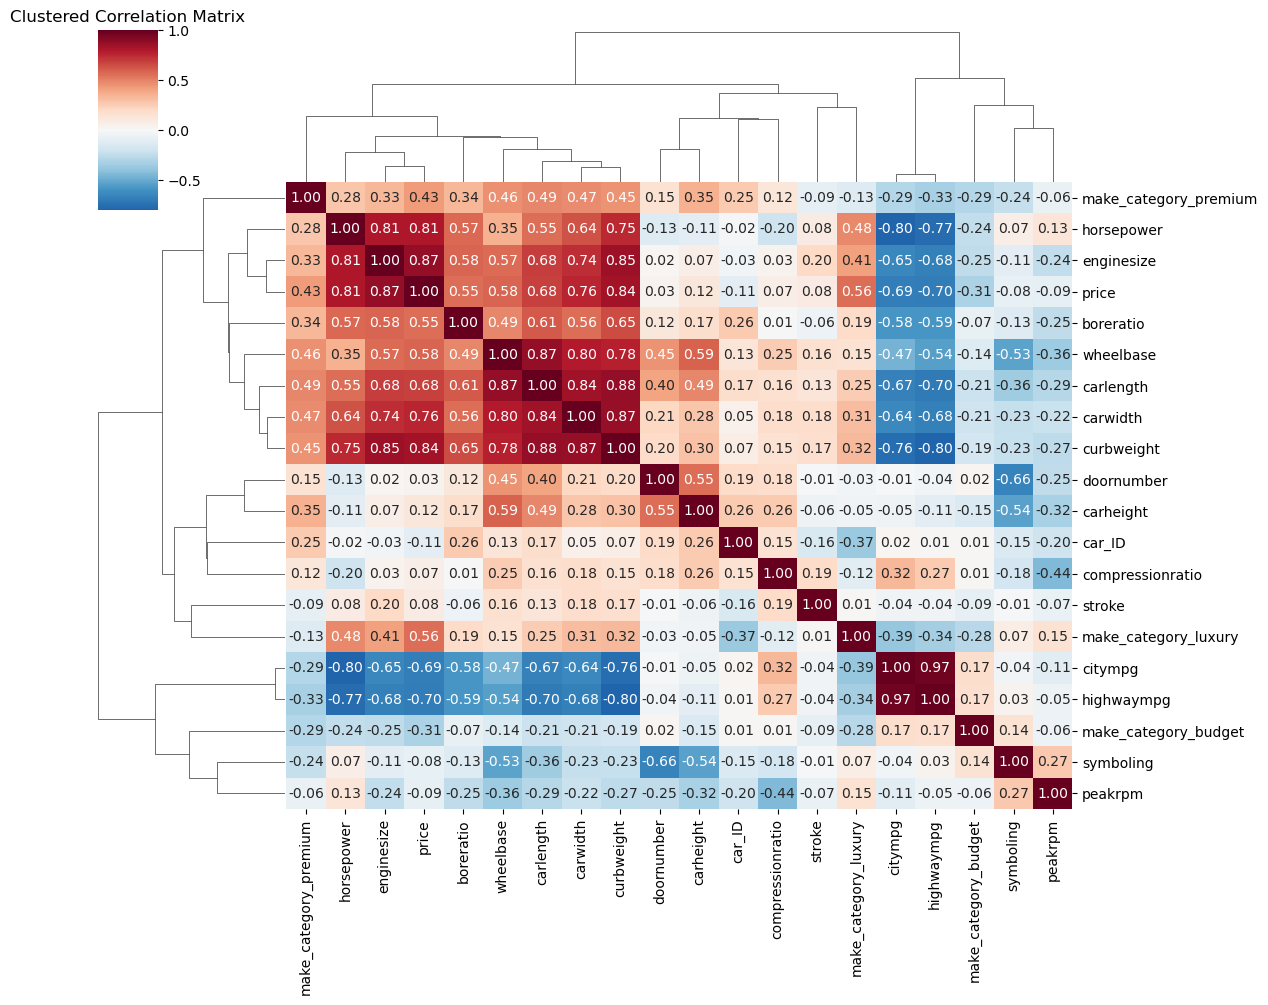

In [16]:
# create corrleation matrix 
corr_matrix = numeric.corr()
# Clustermap groups highly correlated variables together
plt.figure(figsize=(12, 10))
sns.clustermap(corr_matrix, 
               annot=True, 
               cmap='RdBu_r', 
               center=0,
               fmt='.2f',
               figsize=(12, 10))
plt.title('Clustered Correlation Matrix')
plt.show()

In [17]:
# remove highly correlated or unncessary columns 
# car_ID is not needed
# enginesize, boreratio, stroke, peakrpm all correlate to horsepower
# carlength, carwidth, carheight, wheelbase all correlate to curbweight
# highway mpg correlates to citympg
numeric = numeric.drop(columns=['car_ID','enginesize', 'boreratio', 'wheelbase', 'carlength', 'stroke', 
                                'highwaympg', 'peakrpm', 'compressionratio','carwidth', 'carheight'])

<Figure size 1200x1000 with 0 Axes>

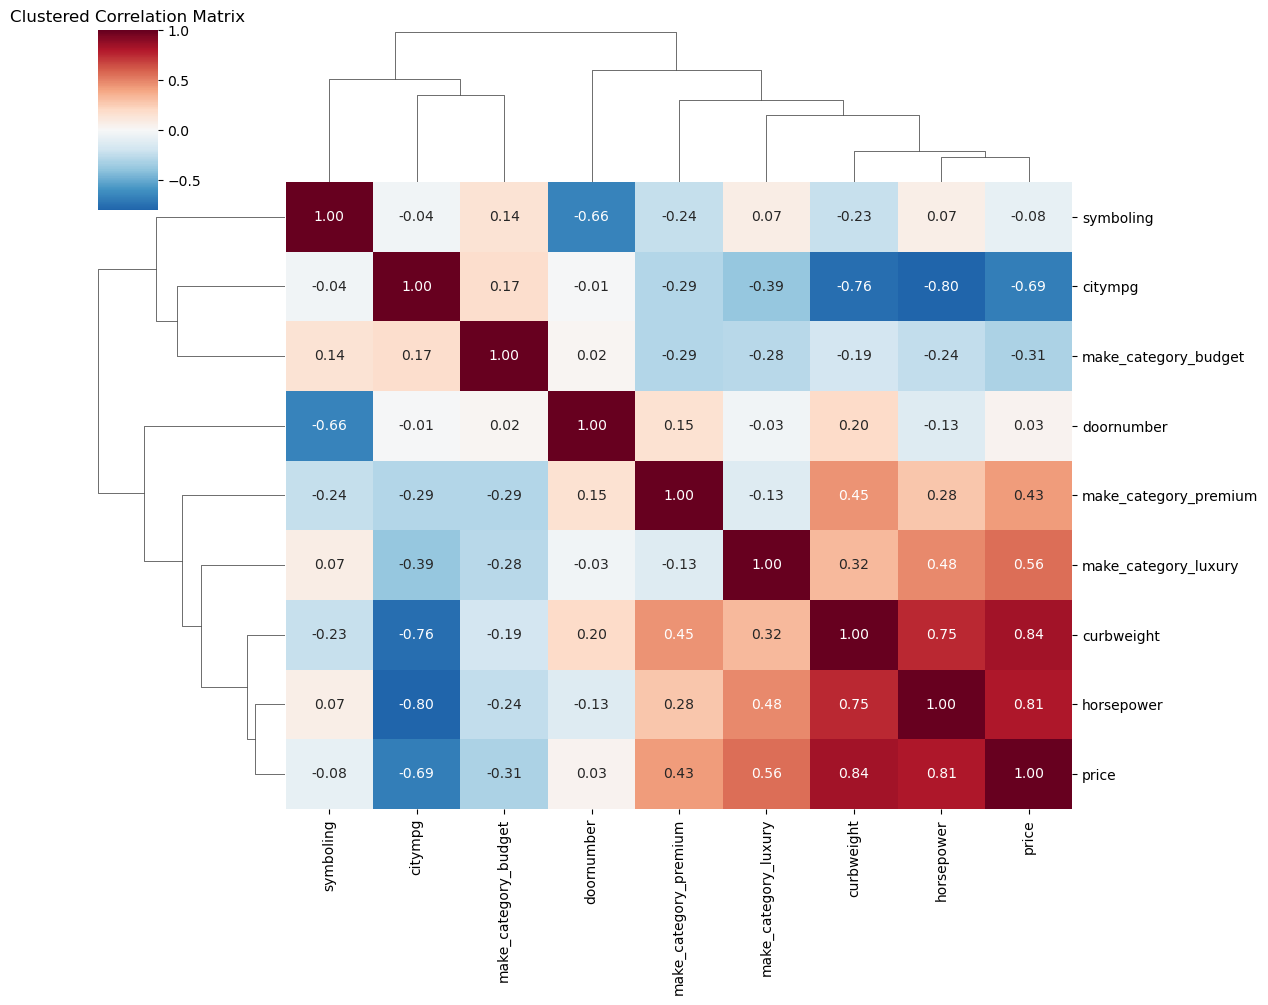

In [18]:
# re create corrleation matrix 
corr_matrix = numeric.corr()
# Clustermap groups highly correlated variables together
plt.figure(figsize=(12, 10))
sns.clustermap(corr_matrix, 
               annot=True, 
               cmap='RdBu_r', 
               center=0,
               fmt='.2f',
               figsize=(12, 10))
plt.title('Clustered Correlation Matrix')
plt.show()

In [19]:
# split the target variable
y=numeric[['price']]
x=numeric.drop(columns=['price'])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [20]:
# check split 
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 99 to 97
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   symboling              164 non-null    int64
 1   doornumber             164 non-null    int64
 2   curbweight             164 non-null    int64
 3   horsepower             164 non-null    int64
 4   citympg                164 non-null    int64
 5   make_category_budget   164 non-null    int32
 6   make_category_luxury   164 non-null    int32
 7   make_category_premium  164 non-null    int32
dtypes: int32(3), int64(5)
memory usage: 9.6 KB


In [21]:
# fit the model and produce results
X2 = sm.add_constant(x_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     117.1
Date:                Sat, 31 May 2025   Prob (F-statistic):           1.07e-61
Time:                        08:31:50   Log-Likelihood:                -1551.6
No. Observations:                 164   AIC:                             3121.
Df Residuals:                     155   BIC:                             3149.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.073e+

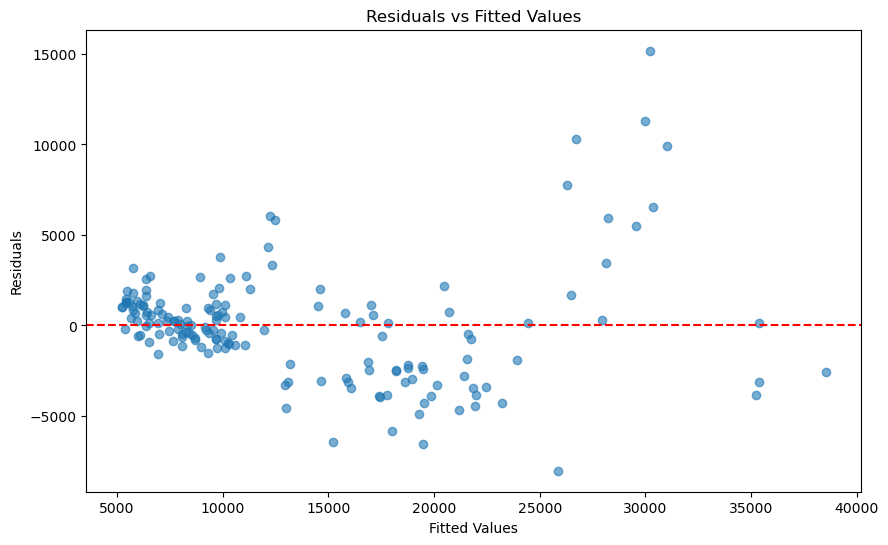

In [22]:
# plot residuals vs fitted values 
residuals = est2.resid
fitted = est2.fittedvalues

plt.figure(figsize=(10, 6))
plt.scatter(fitted, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

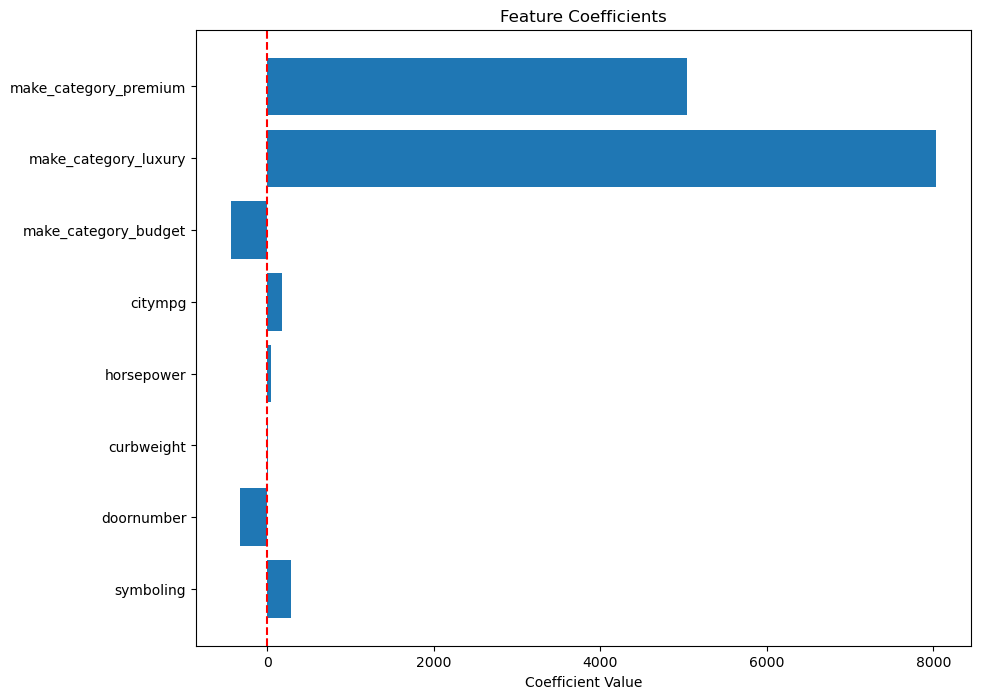

In [23]:
# Plot coefficients (excluding intercept)
coefs = est2.params[1:]  
coef_names = coefs.index

plt.figure(figsize=(10, 8))
plt.barh(range(len(coefs)), coefs.values)
plt.yticks(range(len(coefs)), coef_names)
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients')
plt.axvline(x=0, color='red', linestyle='--')
plt.show()